# Deal Banking Marketing Campaign Dataset With Machine Learning 

In this blog, we will use data related to marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). We will use different type of model and see which model gives highest accuracy.

## Bank Marketing Data Set

### Download

You can download dataset from given source.

https://archive.ics.uci.edu/ml/datasets/bank+marketing

### Data set information

The dataset is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

    There are four datasets:
    1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
    2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
    3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
    4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
    The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

    The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Attribute Information:

#### Input variables:

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')

    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


## Load banking dataset

In [1]:
import pandas as pd

In [2]:
inputFile = "input/bank.csv"

In [3]:
df = pd.read_csv(inputFile, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


We have successfully loaded data into memory.

## View data set details

### Shape

In [4]:
df.shape

(4521, 17)

We have 4521 rows and 17 columns in our banking dataset.

### Data types of columns

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

We can see, some columns are object types, so we will have to convert them to into numerical data. First we will convert into feature and target.

### describe numeric columns

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Visualize the dataset

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set_theme(style="whitegrid")

### Plot job columns

We have type of job: (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'). Let us see the count of each type of job.

In [9]:
job_count = df['job'].value_counts()
job_count

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

Text(0.5, 1.0, 'Type of Job Distribution')

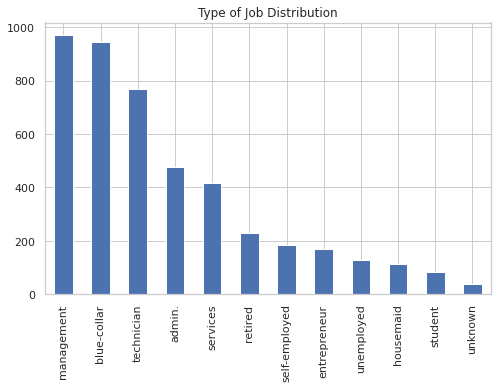

In [10]:
plt.figure(figsize = (8, 5))
job_count.plot(kind = "bar")
plt.title("Type of Job Distribution")

### Plot default column 

Column default syes that client has credit in default or not.  It has categorical value: 'no','yes','unknown'.

In [11]:
default_count = df['default'].value_counts()
default_count

no     4445
yes      76
Name: default, dtype: int64

[Text(0.5, 1.0, 'Default Column Distribution')]

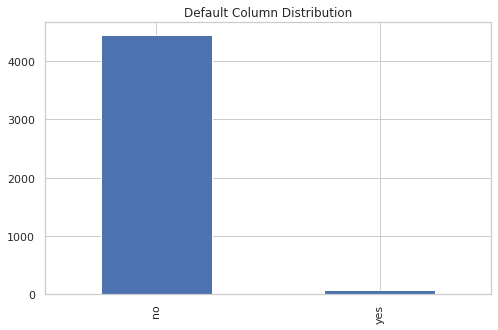

In [12]:
plt.figure(figsize = (8, 5))
default_count.plot(kind='bar').set(title='Default Column Distribution')

### Plot marital status 

marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

In [13]:
marital_count = df['marital'].value_counts()
marital_count

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

[Text(0.5, 1.0, 'Merital Distribution')]

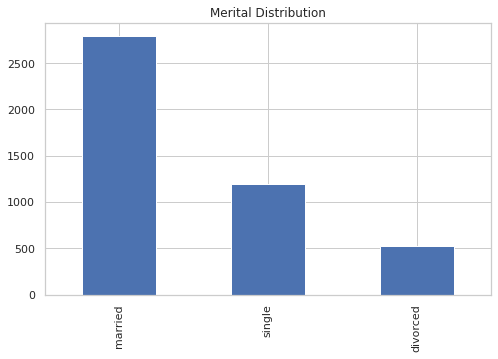

In [14]:
plt.figure(figsize = (8, 5))
marital_count.plot(kind = "bar").set(title = "Merital Distribution")

### Plot customer has personal loan or not

In [15]:
loan_count = df['loan'].value_counts()
loan_count

no     3830
yes     691
Name: loan, dtype: int64

[Text(0.5, 1.0, 'Loan Distribution')]

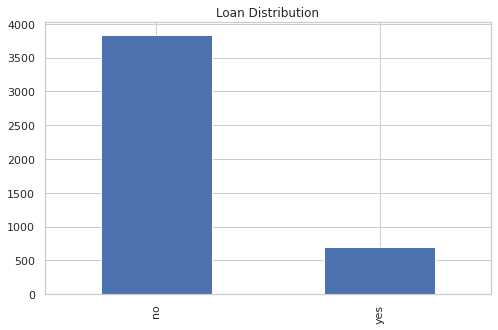

In [16]:
plt.figure(figsize = (8, 5))
loan_count.plot(kind = "bar").set(title = "Loan Distribution")

As per data, some client has taken the personal loan.

### Plot client has housing loan or not

In [17]:
housing_count = df['housing'].value_counts()
housing_count

yes    2559
no     1962
Name: housing, dtype: int64

[Text(0.5, 1.0, 'Housing Loan Distribution')]

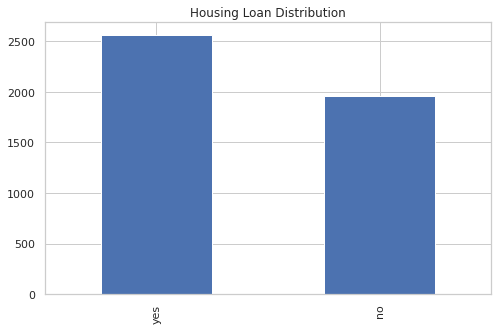

In [18]:
plt.figure(figsize = (8, 5))
housing_count.plot(kind = "bar").set(title = "Housing Loan Distribution")

Most of the client has taken the housing loan.

### Plot education column

In [19]:
education_count = df['education'].value_counts()
education_count

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

[Text(0.5, 1.0, 'Eduction Column Distribution')]

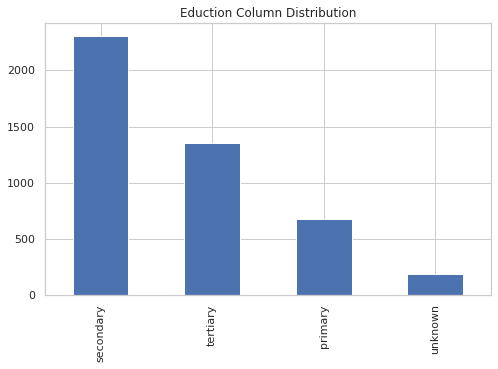

In [98]:
plt.figure(figsize = (8, 5))
education_count.plot(kind = "bar").set(title = "Eduction Column Distribution")

### Plot contact column

Contact column says client were contacted by cellular or telephone.

In [21]:
contact_count = df['contact'].value_counts()
contact_count

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

[Text(0.5, 1.0, 'Contact Column Distribution')]

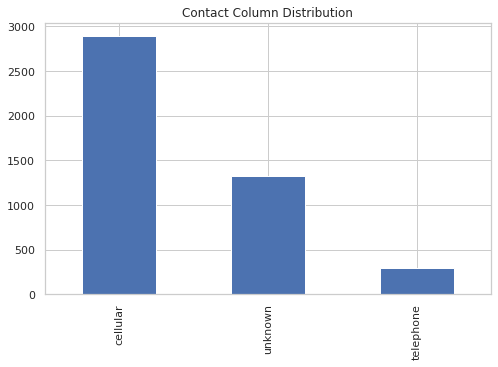

In [22]:
plt.figure(figsize = (8, 5))
contact_count.plot(kind = "bar").set(title = "Contact Column Distribution")

### Plot month column

month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

In [23]:
month_count = df['month'].value_counts()
month_count

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

[Text(0.5, 1.0, 'Month Data Distribution')]

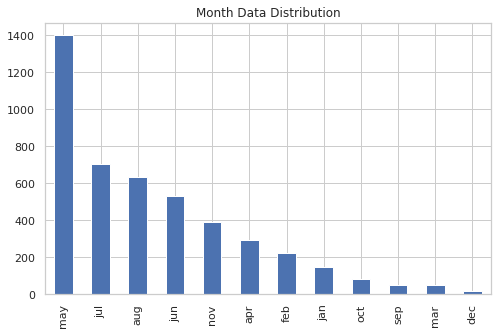

In [24]:
plt.figure(figsize = (8, 5))
month_count.plot(kind = "bar").set(title = "Month Data Distribution")

### Plot pdays column

'pdays' column into a binary variable indicating whether they were contacted or not. 

<AxesSubplot:>

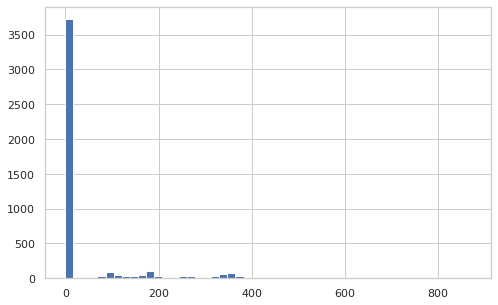

In [25]:
plt.figure(figsize = (8, 5))
df['pdays'].hist(bins = 50)

#### Plot pdays whose value is greater than 0

<AxesSubplot:>

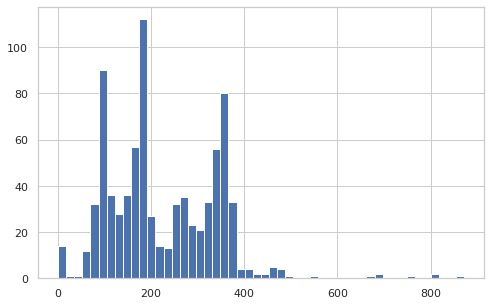

In [27]:
plt.figure(figsize = (8, 5))
df[df['pdays'] > 0]['pdays'].hist(bins=50)

### Plot target column

In [28]:
target_count = df['y'].value_counts()
target_count

no     4000
yes     521
Name: y, dtype: int64

[Text(0.5, 1.0, 'Target Distribution')]

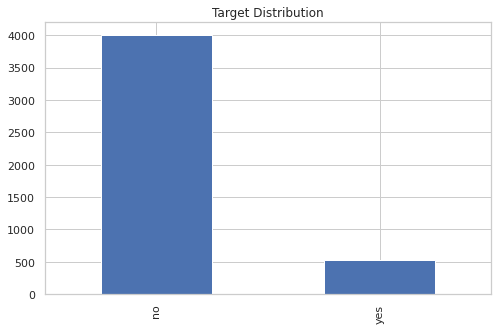

In [29]:
plt.figure(figsize = (8, 5))
target_count.plot(kind = "bar").set(title = "Target Distribution")

#### Plot client has subscribed a term deposit

Text(0.5, 1.0, 'Client has subscribed a term deposite')

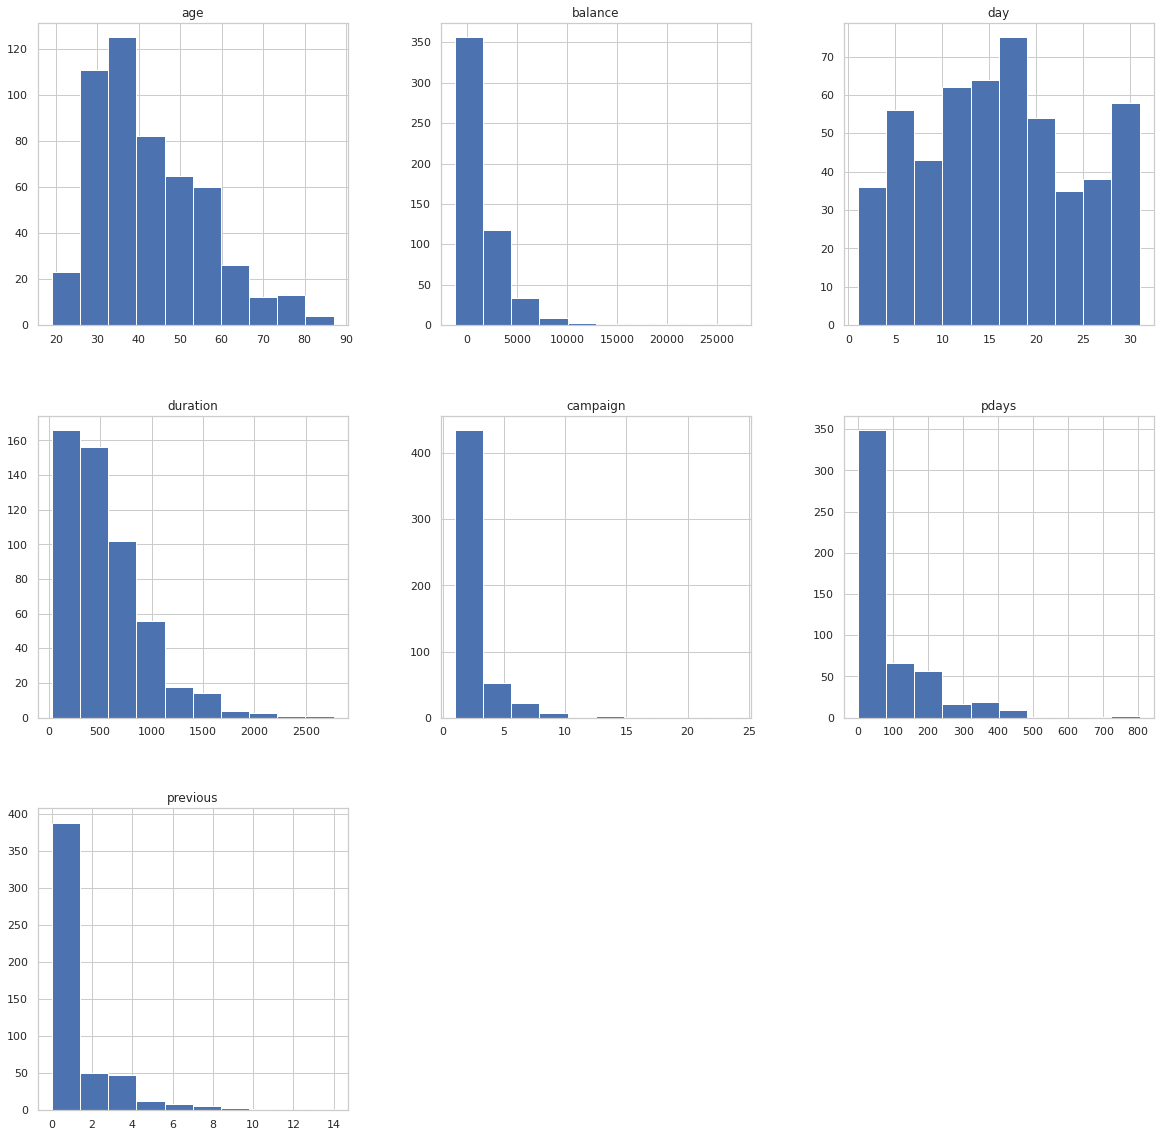

In [30]:
df[df['y'] == 'yes'].hist(figsize = (20,20))
plt.title('Client has subscribed a term deposite')

#### Plot client has not subscribed a term deposit

Text(0.5, 1.0, 'Client has not subscribed a term deposite')

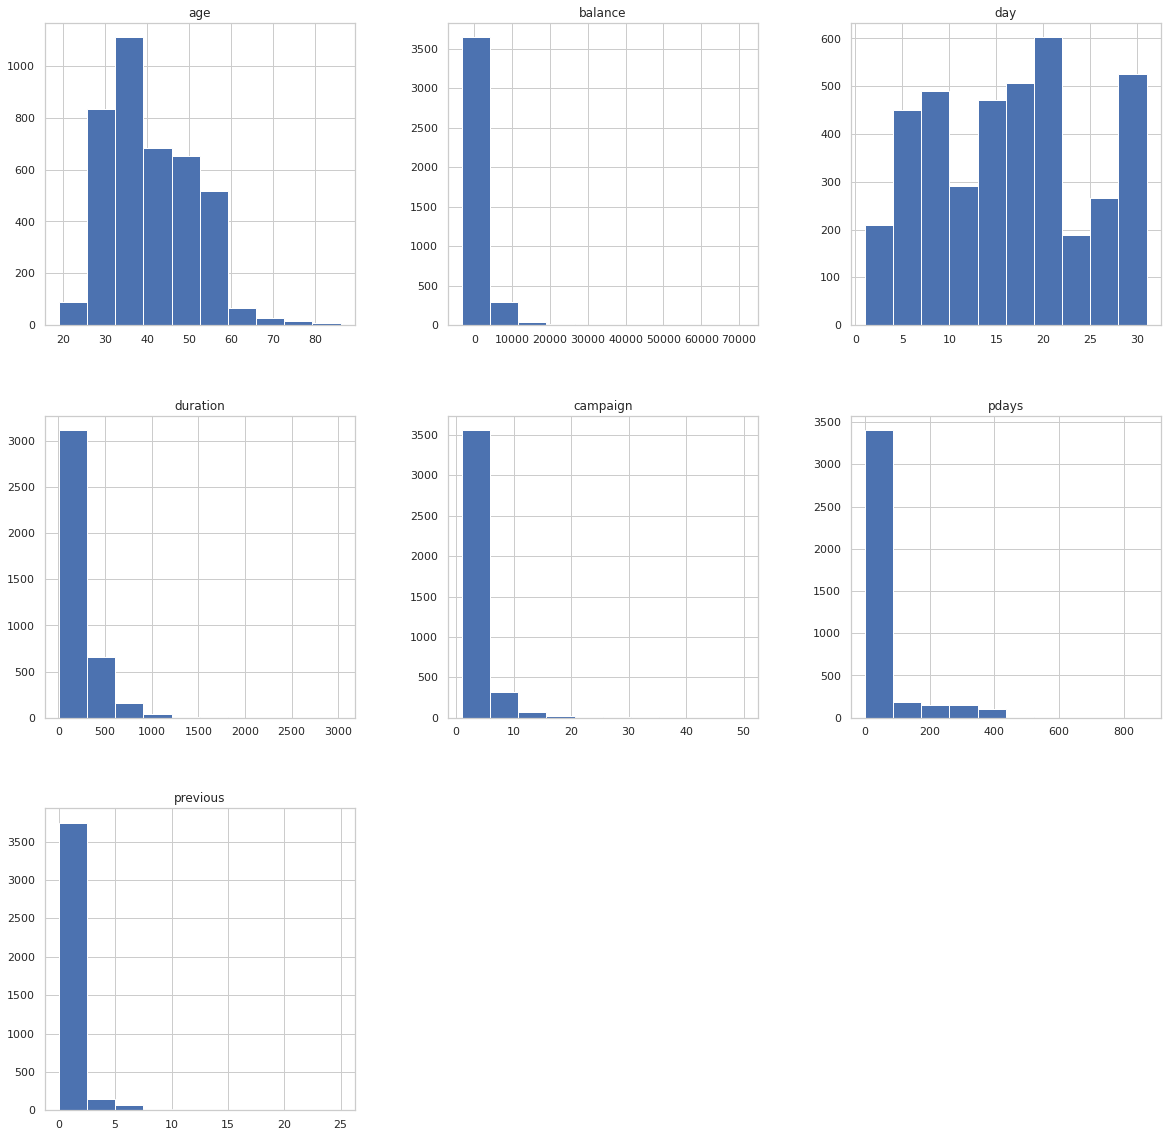

In [31]:
df[df['y'] == 'no'].hist(figsize = (20,20))
plt.title('Client has not subscribed a term deposite')

## Data preprocessing

In [32]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


We can see there are some binary columns(default, housing, loan) which are object type, we need to convert into numeric value.

There are categorical columns also, but there are a limited number of choices. They are job, marital, education, contact, month, and poutcome. That also need to converted into numerical format.

All feature columns we need to convert into numeric values then only we can feed into the model. 

### Convert default column into numeric value

We can convert the yes values to 1, and the no values to 0 for default column. We will lamda function for tis

#### pandas.DataFrame.apply

DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)

    Apply a function along an axis of the DataFrame.

    Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). 

In [33]:
df['is_default'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0)

#### View default and is_default columns together

In [34]:
df[['default','is_default']].tail(10)

,default,is_default
4511,no,0
4512,no,0
4513,no,0
4514,no,0
4515,no,0
4516,no,0
4517,yes,1
4518,no,0
4519,no,0
4520,no,0


### Convert housing column into numeric value

For housing column also we will do the same. 

In [35]:
df['is_housing'] = df['housing'].apply(lambda row: 1 if row == 'yes' else 0)

In [36]:
df[['housing','is_housing']].tail(10)

,housing,is_housing
4511,yes,1
4512,yes,1
4513,no,0
4514,yes,1
4515,yes,1
4516,yes,1
4517,yes,1
4518,no,0
4519,no,0
4520,yes,1


### Convert loan column into numeric value

In [37]:
df['is_loan'] = df['loan'].apply(lambda row: 1 if row == 'yes' else 0)

In [38]:
df[['loan', 'is_loan']].tail(10)

,loan,is_loan
4511,no,0
4512,no,0
4513,no,0
4514,no,0
4515,no,0
4516,no,0
4517,yes,1
4518,no,0
4519,no,0
4520,yes,1


### Convert target column 'y' into numeric value

In [39]:
df['target'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)

In [40]:
df[['y', 'target']].tail(10)

,y,target
4511,yes,1
4512,no,0
4513,no,0
4514,no,0
4515,no,0
4516,no,0
4517,no,0
4518,no,0
4519,no,0
4520,no,0


### Creating  one-hot encoding for non-numeric merital column

For marital column, we have three values married, single and divorced. We will use pandas' get_dummies function to convert categorical variable into dummy/indicator variables.

##### pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

    Convert categorical variable into dummy/indicator variables.

###### Parameters

        data: array-like, Series, or DataFrame

            Data of which to get dummy indicators.
            
        prefix: str, list of str, or dict of str, default None

            String to append DataFrame column names. Pass a list with length equal to the number of columns when calling get_dummies on a DataFrame. Alternatively, prefix can be a dictionary mapping column names to prefixes.
        
        prefix_sep: str, default ‘_’

            If appending prefix, separator/delimiter to use. Or pass a list or dictionary as with prefix.
        
        dummy_na: bool, default False

            Add a column to indicate NaNs, if False NaNs are ignored.
        
        columns: list-like, default None

            Column names in the DataFrame to be encoded. If columns is None then all the columns with object or category dtype will be converted.
        
        sparse: bool, default False

            Whether the dummy-encoded columns should be backed by a SparseArray (True) or a regular NumPy array (False).
        
        drop_first: bool, default False

            Whether to get k-1 dummies out of k categorical levels by removing the first level.
        dtyped: type, default np.uint8

            Data type for new columns. Only a single dtype is allowed.

###### Returns

        DataFrame

            Dummy-coded data.

 

In [41]:
marital_dummies = pd.get_dummies(df['marital'], prefix = 'marital')
marital_dummies.tail()

,marital_divorced,marital_married,marital_single
4516,0,1,0
4517,0,1,0
4518,0,1,0
4519,0,1,0
4520,0,0,1


#### Merge marital_dummies with marital column

In [42]:
pd.concat([df['marital'], marital_dummies], axis=1).head(n=10)

,marital,marital_divorced,marital_married,marital_single
0,married,0,1,0
1,married,0,1,0
2,single,0,0,1
3,married,0,1,0
4,married,0,1,0
5,single,0,0,1
6,married,0,1,0
7,married,0,1,0
8,married,0,1,0
9,married,0,1,0


We can see in each of the rows there is one value of 1, which is in the column corresponding the value in the marital column.

There are three values, if two of the values in the dummy columns are 0 for a particular row, then the remaining column must be equal to 1. It is important to eliminate any redundancy and correlations in features as it becomes difficult to determine which feature is most important in minimizing the total error.

So let us remove one column divorced.

#### Remove marital_divorced column

In [43]:
marital_dummies.drop('marital_divorced', axis=1, inplace=True)

In [44]:
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


#### merge marital_dummies into main dataframe

In [45]:
df = pd.concat([df, marital_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,is_default,is_housing,is_loan,target,marital_married,marital_single
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,-1,0,unknown,no,0,0,0,0,1,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,339,4,failure,no,0,1,1,0,1,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,330,1,failure,no,0,1,0,0,0,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,-1,0,unknown,no,0,1,1,0,1,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,-1,0,unknown,no,0,1,0,0,1,0


### Creating one hot encoding for job column

In [46]:
job_dummies = pd.get_dummies(df['job'], prefix = 'job')
job_dummies.tail()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
4516,0,0,0,0,0,0,0,1,0,0,0,0
4517,0,0,0,0,0,0,1,0,0,0,0,0
4518,0,0,0,0,0,0,0,0,0,1,0,0
4519,0,1,0,0,0,0,0,0,0,0,0,0
4520,0,0,1,0,0,0,0,0,0,0,0,0


In [47]:
job_dummies.drop('job_unknown', axis=1, inplace=True)

In [48]:
df = pd.concat([df, job_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,0,0,0,0,0,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,0,0,0,0,1,0,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,0,1,0,0,0,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,0,0,0,1,0,0,0,0,0,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,1,0,0,0,0,0,0,0,0,0


### Creating one hot encoding for education column

In [49]:
education_dummies = pd.get_dummies(df['education'], prefix = 'education')
education_dummies.tail()

,education_primary,education_secondary,education_tertiary,education_unknown
4516,0,1,0,0
4517,0,0,1,0
4518,0,1,0,0
4519,0,1,0,0
4520,0,0,1,0


In [50]:
education_dummies.drop('education_unknown', axis=1, inplace=True)
education_dummies.tail()

,education_primary,education_secondary,education_tertiary
4516,0,1,0
4517,0,0,1
4518,0,1,0
4519,0,1,0
4520,0,0,1


In [51]:
df = pd.concat([df, education_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,0,0,1,1,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,0,1,0,0,0,0,1,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,1,0,0,0,0,0,0,0,0,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,1,0,0,0,0,0,0,0,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0


### Creating one hot encoding for contact column

In [52]:
contact_dummies = pd.get_dummies(df['contact'], prefix = 'contact')
contact_dummies.tail()

,contact_cellular,contact_telephone,contact_unknown
4516,1,0,0
4517,0,0,1
4518,1,0,0
4519,1,0,0
4520,1,0,0


In [53]:
contact_dummies.drop('contact_unknown', axis=1, inplace=True)
contact_dummies.tail()

,contact_cellular,contact_telephone
4516,1,0
4517,0,0
4518,1,0
4519,1,0
4520,1,0


In [54]:
df = pd.concat([df, contact_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,1,1,0,0,1,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,1,0,0,0,0,1,0,1,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,0,0,0,0,0,1,1,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,0,0,0,0,0,0,0,1,0,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0,0,0,0,0,0,1,0,0,0


### Creating one hot encoding for poutcome column

In [55]:
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
poutcome_dummies.tail()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
4516,0,0,0,1
4517,0,0,0,1
4518,0,0,0,1
4519,0,1,0,0
4520,0,1,0,0


In [56]:
poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
poutcome_dummies.tail()

,poutcome_failure,poutcome_other,poutcome_success
4516,0,0,0
4517,0,0,0
4518,0,0,0
4519,0,1,0
4520,0,1,0


In [57]:
df = pd.concat([df, poutcome_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,1,1,0,0,1,0,0,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0,0,0,1,0,1,0,1,0,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0,0,0,0,1,1,0,1,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,0,0,0,0,1,0,0,0,0,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,0


### Convert month column into numeric value

In [58]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}

In [59]:
df['month'] = df['month'].map(months)
df['month'].head()

0    10
1     5
2     4
3     6
4     5
Name: month, dtype: int64

### pdays column

'pdays' column indicates the number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted). If the value of 'pdays' is '-1', if so we will associate that with a value of 0,

In [60]:
df[df['pdays'] == -1]['pdays'].count()

3705

In [61]:
df['was_contacted'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)

In [62]:
df[['pdays','was_contacted']].head()

,pdays,was_contacted
0,-1,0
1,339,1
2,330,1
3,-1,0
4,-1,0


### Delete job, education, default, housing, loan, contact, month, pdays, poutcome, y columns

In [63]:
df.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'pdays', 'poutcome', 'y'], axis=1, inplace=True)

## View After converting all columns into numeric column

In [64]:
df.dtypes

age                    int64
balance                int64
day                    int64
month                  int64
duration               int64
campaign               int64
previous               int64
is_default             int64
is_housing             int64
is_loan                int64
target                 int64
marital_married        uint8
marital_single         uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
contact_cellular       uint8
contact_telephone      uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
was_contacted          int64
dtype: object

In [65]:
df.head(10)

,age,balance,day,month,duration,campaign,previous,is_default,is_housing,is_loan,...,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,was_contacted
0,30,1787,19,10,79,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
1,33,4789,11,5,220,1,4,0,1,1,...,0,0,1,0,1,0,1,0,0,1
2,35,1350,16,4,185,1,1,0,1,0,...,0,0,0,1,1,0,1,0,0,1
3,30,1476,3,6,199,4,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,59,0,5,5,226,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
5,35,747,23,2,141,2,3,0,0,0,...,0,0,0,1,1,0,1,0,0,1
6,36,307,14,5,341,1,2,0,1,0,...,0,0,0,1,1,0,0,1,0,1
7,39,147,6,5,151,2,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
8,41,221,14,5,57,2,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9,43,-88,17,4,313,1,2,0,1,1,...,0,1,0,0,1,0,1,0,0,1


## Convert into X(features) and y(target)

In [66]:
#The axis=1 argument drop columns
X = df.drop('target', axis=1)
y = df['target']

In [67]:
X.shape

(4521, 32)

In [68]:
y.shape

(4521,)

## Divide features and target into train and test data

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

### View the shape of X_train, X_test, y_train, y_test

In [71]:
X_train.shape

(3616, 32)

In [72]:
y_train.shape

(3616,)

In [73]:
X_test.shape

(905, 32)

In [74]:
y_test.shape

(905,)

## Create a LogisticRegression model

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model = LogisticRegression()

### Train the model

In [77]:
model.fit(X_train, y_train)

/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### Predict test data

In [78]:
y_pred = model.predict(X_test)

In [79]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [80]:
print("Predicted value: ", y_pred[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 1]
Actual value:  4519    0
784     0
25      0
2461    0
960     0
3878    0
3399    0
1262    0
760     0
1175    0
Name: target, dtype: int64


### View accuracy of the model

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy = accuracy_score(y_pred = y_pred, y_true = y_test)
print(f'Accuracy of the model Logistic Regression is {accuracy*100:.2f}%')

Accuracy of the model Logistic Regression is 89.83%


## Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc = RandomForestClassifier()

In [85]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [86]:
rfcpredictions = rfc.predict(X_test)

In [87]:
print("Predicted value: ", rfcpredictions[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  4519    0
784     0
25      0
2461    0
960     0
3878    0
3399    0
1262    0
760     0
1175    0
Name: target, dtype: int64


In [88]:
accuracy = accuracy_score(y_pred = rfcpredictions, y_true = y_test)
print(f'Accuracy of the Random Forest Classifier model is {accuracy*100:.2f}%')

Accuracy of the Random Forest Classifier model is 91.71%


## SVC (support Vector Classifier)

In [89]:
from sklearn.svm import SVC

In [90]:
svc = SVC()

In [91]:
svc.fit(X_train, y_train)

SVC()

In [92]:
svcpredictions = svc.predict(X_test)

In [93]:
print("Predicted value: ", svcpredictions[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 0]
Actual value:  4519    0
784     0
25      0
2461    0
960     0
3878    0
3399    0
1262    0
760     0
1175    0
Name: target, dtype: int64


In [94]:
accuracy = accuracy_score(y_pred = svcpredictions, y_true = y_test)
print(f'Accuracy of the SVC model is {accuracy*100:.2f}%')

Accuracy of the SVC model is 89.61%


## Decision Tree Classifier

In [95]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtcprediction = dtc.predict(X_test)

In [96]:
print("Predicted value: ", dtcprediction[:10])
print("Actual value: ", y_test[:10])

Predicted value:  [0 0 0 0 0 0 0 0 0 1]
Actual value:  4519    0
784     0
25      0
2461    0
960     0
3878    0
3399    0
1262    0
760     0
1175    0
Name: target, dtype: int64


In [97]:
accuracy = accuracy_score(y_pred = dtcprediction, y_true = y_test)
print(f'Accuracy of the Decision Tree Classifier model is {accuracy*100:.2f}%')

Accuracy of the Decision Tree Classifier model is 87.29%


We can see Random Forest Classifier model gives us highest accuracy 91.49%.